In [41]:
%matplotlib inline

import h5py
import numpy as np
import os
import scipy.io as sio

import matplotlib.pyplot as plt

In [ ]:
DATA_DIR = os.getenv("DATA_DIR")
# DATA_DIR = "/usr0/home/sibiv/Research/Data/TransferLearning"
PIGVID_DIR = os.path.join(DATA_DIR, "PigVideos")

In [28]:
pv_files = list(os.walk(PIGVID_DIR))
data_files = sorted([f for f in pv_files[0][-1] if f[-4:] == ".mat"])
anno_files, spf_files, feat_files, mat_files = [], [], [], []

for fl in data_files:
  if fl[-9:] == ".anno.mat": anno_files.append(os.path.join(PIGVID_DIR, fl))
  elif fl[-8:] == ".spf.mat": spf_files.append(os.path.join(PIGVID_DIR, fl))
  elif fl[-9:] == ".feat.mat": feat_files.append(os.path.join(PIGVID_DIR, fl))
  else: mat_files.append(os.path.join(PIGVID_DIR, fl))

In [31]:
npts = 10
anno_data, spf_data, feat_data, mat_data = {}, {}, {}, {}

for idx, (afl, sfl, ffl, mfl) in enumerate(zip(anno_files, spf_files, feat_files, mat_files)):
  if idx >= npts:
    break
  anno_data[idx] = sio.loadmat(afl)
  spf_data[idx] = h5py.File(sfl, 'r')
  feat_data[idx] = sio.loadmat(ffl)
  mat_data[idx] = h5py.File(mfl, 'r')
  

In [38]:
print(feat_data[0]["features"].shape)
print(anno_data[0]["labels"].shape)

(37509, 122)
(480, 720)


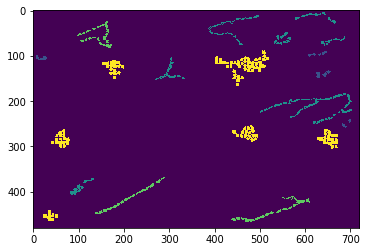

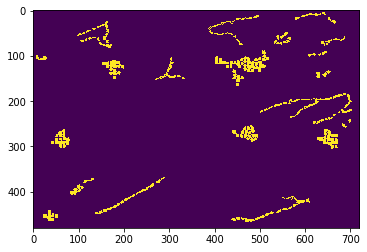

In [50]:
plt.imshow(anno_data[0]["labels"])
plt.figure()
plt.imshow(anno_data[0]["lpoints"])

In [48]:
for key, val in anno_data[0].items():
  if isinstance(val, np.ndarray):
    print(key, val.shape)

labels (480, 720)
lidx (12893, 1)
lpoints (480, 720)


In [52]:
lidx = anno_data[0]["lidx"]